In [6]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt

yf.pdr_override()

With this notebook, I want to study past market data for backtesting purposes, without relying on my insights to predict future price movements. I will be using the index Standard & Poor 500(S&P 500), which is considered a good indicator of market performance, because of the names included in this list. It also provides highly liquid futures and options markets.

We will start by getting the data to be be read and implement a basic backtesting for a trading system based on trend signals.

In [7]:
# Standard & Poor 500 index stock prices
tickers = ['^GSPC']

start_date = '2005-07-24'
end_date = '2019-05-13'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
sp500 = pdr.get_data_yahoo(tickers,start=start_date, end=end_date)
sp500.info()


[*********************100%***********************]  1 of 1 downloaded
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3473 entries, 2005-07-25 to 2019-05-10
Data columns (total 6 columns):
Open         3473 non-null float64
High         3473 non-null float64
Low          3473 non-null float64
Close        3473 non-null float64
Adj Close    3473 non-null float64
Volume       3473 non-null int64
dtypes: float64(5), int64(1)
memory usage: 189.9 KB


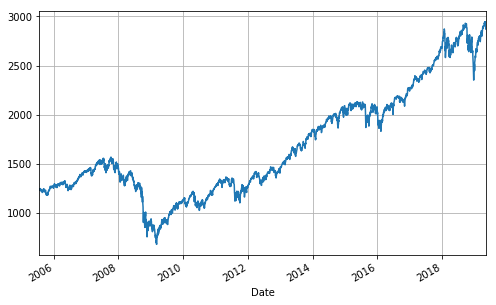

In [8]:
sp500['Close'].plot(grid=True, figsize=(8,5))

In the plot above we can visualise a time series data('Closing Prices') for the S&P 500 index from 2005-07-24 until 2019-05-13.

I want to implement a trend strategy based on a month (21 days) and 6 months (126 days).

In [9]:
# Moving Averages for 2 months(42 days) & a year(252 days)

sp500['21d'] = np.round(sp500['Close'].rolling(21).mean(), 2)

sp500['126d'] = np.round(sp500['Close'].rolling(126).mean(), 2)

In [10]:
sp500[['Close', '21d', '126d']].tail()

,Close,21d,126d
Date,,,
2019-05-06,2932.47,2914.85,2735.29
2019-05-07,2884.05,2914.44,2736.44
2019-05-08,2879.42,2913.66,2737.68
2019-05-09,2870.72,2913.31,2738.73
2019-05-10,2881.40,2912.98,2739.73


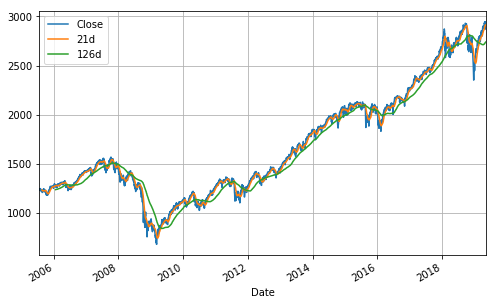

In [12]:
sp500[['Close', '21d', '126d']].plot(grid = True, figsize=(8,5))

The plot above provides us with insights regarding upward/  downward trends that occurred in the past. This will be used to forecast future stock prices fluctuations and assist us in the decision-making process regarding:
    Buying
    Waiting
    Selling
    
    
The rule to generate trading signals are as follows:

Buy Signal( "Go Long" )
    The 21d trend is for the first time SD points above the 126d trend
    
Wait( "Park In Cash" )
    The 21d trend is within a range of +/- SD points around the 126d trend
    
Sell Signal(" Go Short" )
    The 21d trend is for the first time below the 126d trend
    
    
To make this work, I need to add an extra column to my DataFrame with the differences between the two trends

In [ ]:
sp500['21d - 126d'] = sp500['21d'] - sp500['126d']
sp500['21d - 126d'].tail()